# Classification

So far we have looking at how to fit functions to data. This is a regression problem. Now we are going to change pace a bit and focus on a classification task.
The problem here is not to discover a function that fit the data points. Here we assume that there are two classes of data, labelled as class $1$ or class $-1$. We would like to separate points from those two classes.

The idea is to fit a function $f(x)$, which is positive to class 1 and negative for class -1.

We are going to take a more heuristic approach here, because the objective is to show one example on which we can apply the kernel trick. We will start first with a function $f(x)$ that is a line (or hyper-plane in $n$-dimensional space). After we establish how that can be done, we will use the kernel trick to obtain a non-linear separation between the two classes.


# Support Vector Machines

Support Vector Machines (SVM) are supervised classification and regression methods which are extremely robust to outliers.

Let us start with a linear classification: in this case, we try to choose a line or hyper-plane  that separates the data in two classes. The SVM model chooses this hyperplane based only on the data points close to the decision boundary and any point in time and not based on the entire dataset. Because the method focus only on points close to the decision boundary, any outlier away from the decision boundary does not have a strong influence on the choice of the boundary itself.

Let us assume we have some data points $x_1, x_2, x_3, \ldots, x_N$ and each of them belong to either class $-1$ or class $1$. Their true class is informed by the known target classes $t_1, t_2, t_3, \ldots, t_N$. We want to choose the parameters $w$ and $b$ of a line (or hyperplane in more than 2 dimensions) such that we can easily estimate the unknown class of a new data point $x^\prime$. For that, we define the decision boundary as:

$y(x) = w^T x + b$,

and we say that if $y(x^\prime) > 0$, the data point belongs to class $1$, otherwise it belongs to class $-1$. The equation of the decision boundary is then $y(x) = 0$. See the figure below (from Wikipedia).

![SVM_margin.png](https://raw.githubusercontent.com/European-XFEL/ml-lecture-oct-2023/main/SVM_margin.png)

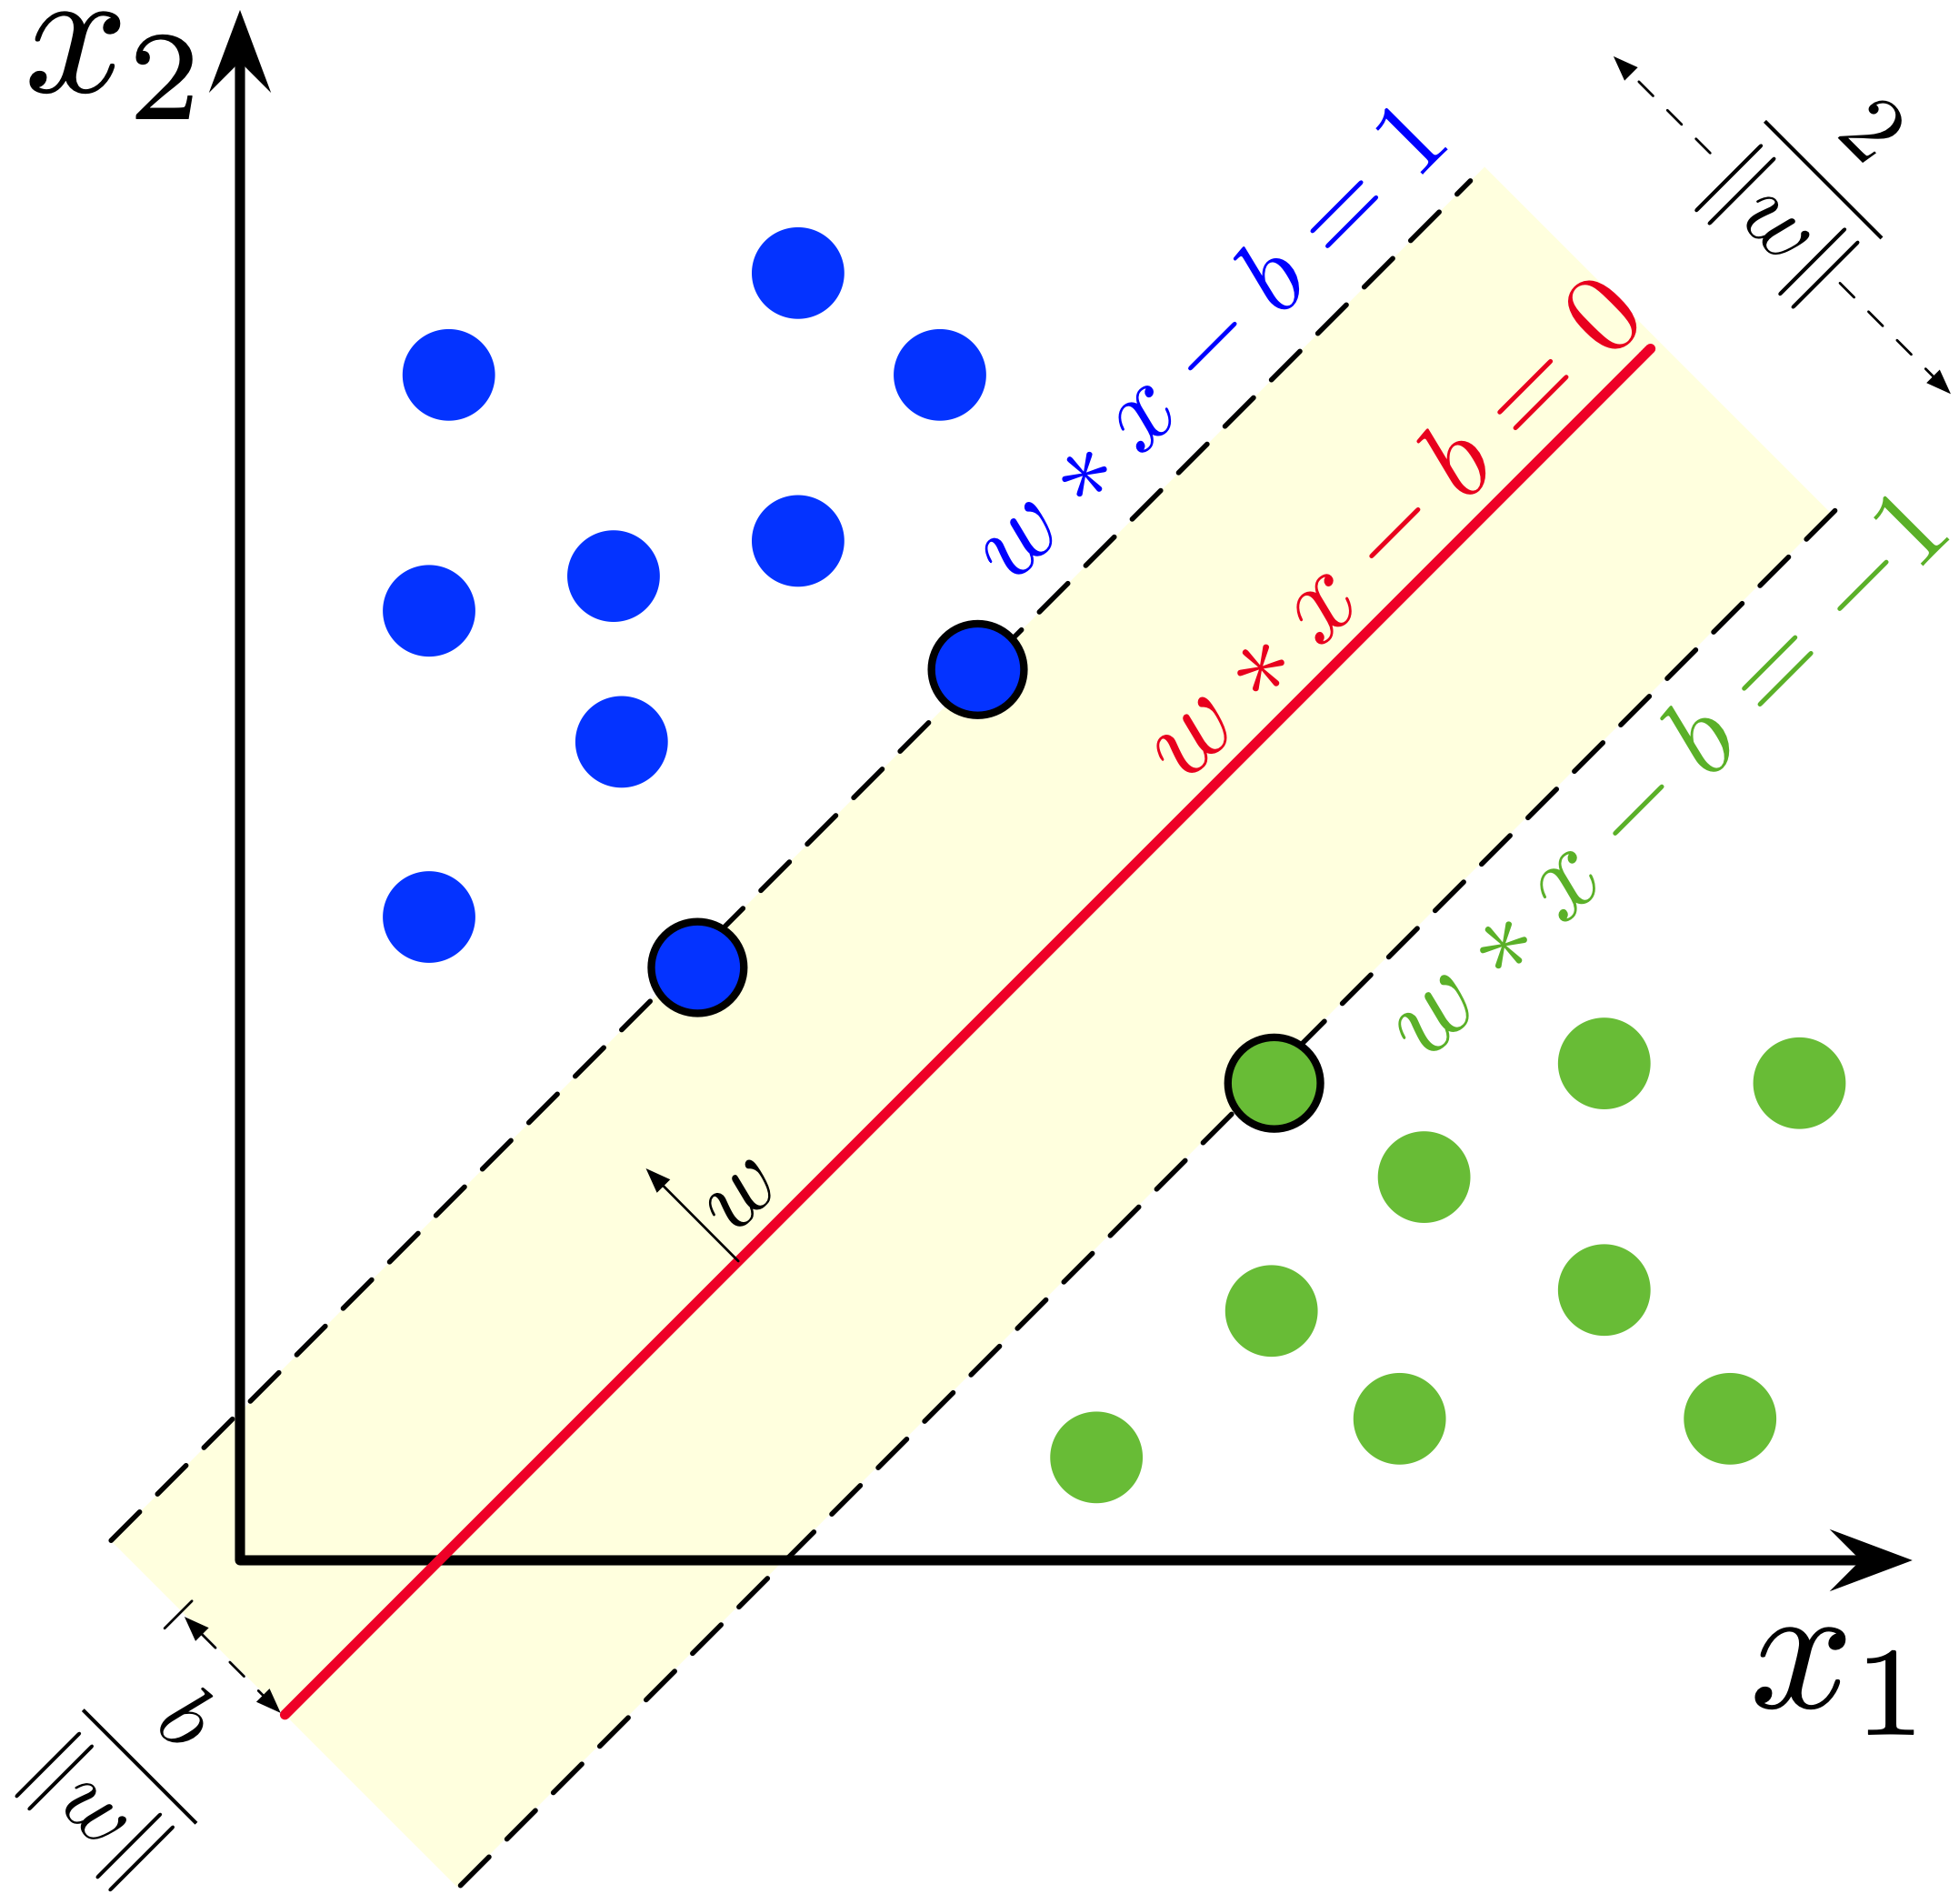


Because of our choice of $t_i \in \{+1, -1\}$, we can also write for all data points for which we know the true class: $t_i y(x_i) > 0$, since $y(x_i) < 0$ if $t_i = -1$ and $y (x_i) > 0$ if $t_i > 0$. The idea in SVMs is choose $w$ and $b$ to maximize the distance between the boundary points and the line. What is this distance between a given point and the decision boundary? This can be seen from simple geometrical calculations in the figure below (from Bishop (2006)). Given a known decision boundary, this distance for a point $x$ shall be $\frac{|y(x)|}{|w|}$.

![linear_classifier.png](https://raw.githubusercontent.com/European-XFEL/ml-lecture-oct-2023/main/linear_classifier.png)

As we want that $t_i y(x_i) > 0$ be true for all points close to the boundary, we can use $t_i y(x_i)$ instead of $|y(x_i)|$, using $t_i$ to guarantee that the numerator is always positive, instead of relying on the absolute value. To focus only on the points close to the decision boundary, we try to find $w$ and $b$ which *maximize* the *minimum distance* between the decision boundary and the data points. As the minimum distance is determined only by the points close to the boundary, this makes the method insensitive to what happens away from the decision boundary. Our objective is then to find $w$ and $b$ that satisfy:

$\text{argmax}_{w, b} \left[\frac{1}{|w|} \min_{i} t_i \left(w^T x + b\right) \right]$.

This is a very hard problem, but notice that we only care about the distance between the points and the boundary, and if $w$ and $b$ are both multiplied by the same number, this distance does not change. We can therefore choose a normalisation so that $t_i (w^T x_i + b) = 1$ for the point closest to the boundary. This implies that $t_k (w^T x_k + b) \geq 1$ for all points in the dataset. Since there is always one point closest, the condition is to maximize $\frac{1}{|w|}$ (that is, the remaining factor) for that point, which is equivalent to minimize $|w|^2$ for the closest point while miximizing the condition above.

This can be summarized in simpler form using the Lagrange multiplier formalism, which translates this complex constrained optimization into a simpler unconstrained optimization problem. In that formalism we need to minimize a cost function $\mathcal{L}$, which introduces the Lagrange multipliers $a_i$:

$\mathcal{L}(w, b, a) = \frac{1}{2} |w|^2 - \sum_i a_i \left[ t_i \left(w^T x_i + b\right) - 1\right]$

One can set the derivative of $\mathcal{L}$ to zero with respect to $w$, $b$ and $a$ to obtain a simpler version of this optimization problem. Further details can be consulted in Bishop (2006) or in the Wikipedia description.

It is interesting to note that by using the Kernel trick, one can choose the function $y(x) = w^T \phi(x) + b$ and with an appropriate choise of $\phi$, we can apply a linear classification after a non-linear transformation which allows this method to be expanded into non-linear classification. It can be shown following the procedure above that the final algorithm does not depend on $\phi(x)$, but only on $k(x, x^\prime) = \phi(x)\phi(x^\prime)$, so one needs only to specify the kernel function $k$.

Similar logic can be used for regression, on which only the *worse* prediction of the feature becomes relevant.

Fortunately the details of the algorithm are not needed to implement this for classification. In the following example, we show how the algorithm can be easily used from the scikit-learn modules.
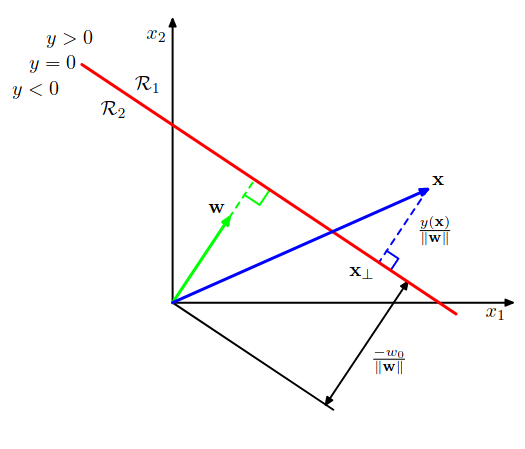

We start by loading the necessary Python modules. If you have not yet installed them, run the following cell to install them with pip:

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import svm

Let's generate the fake data now to have something to cluster.

In [2]:
def generate_data(N: int) ->np.ndarray:
    assert N > 1
    loc = [np.array([2.0, 2.0]), np.array([-1.0, 1.0])]
    scale = [np.array([0.5, 0.5]), np.array([0.5, 0.2])]
    data = np.concatenate([np.random.default_rng().laplace(loc=l, scale=s, size=(N, 2))
                           for l, s in zip(loc, scale)], axis=0)
    source = np.concatenate([k*np.ones([N, 1]) for k in range(len(loc))], axis=0)
    return np.concatenate([data, source], axis=1)


In [3]:
data = generate_data(N=1000)
data = pd.DataFrame(data, columns=["x", "y", "source"])

Let's print out the dataset read first.

In [4]:
data

,x,y,source
0,2.696133,2.569388,0.0
1,2.156646,1.907207,0.0
2,3.219006,2.012231,0.0
3,2.075721,1.932324,0.0
4,1.698718,2.143439,0.0
...,...,...,...
1995,-2.023710,1.375677,1.0
1996,1.190933,0.369058,1.0
1997,-1.525767,1.248843,1.0
1998,-1.191291,0.644813,1.0


We can plot this fairly easily using Matplotlib.

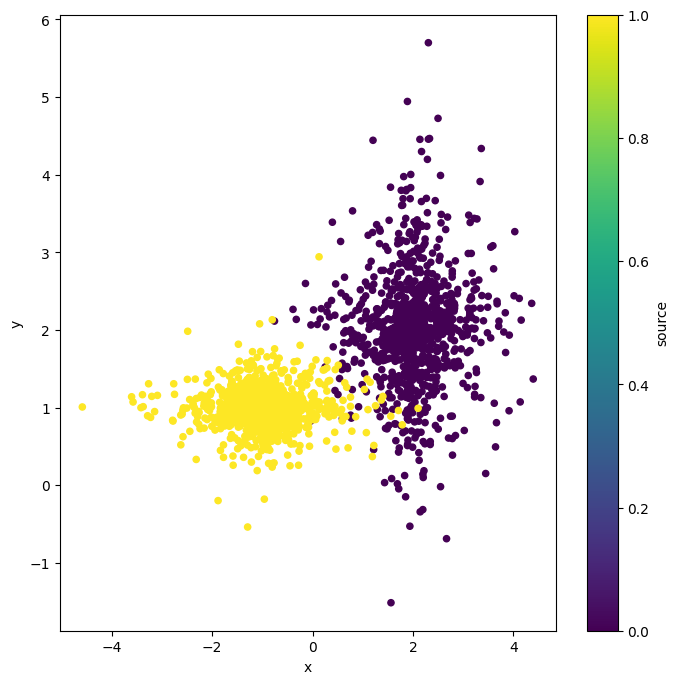

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
data.plot.scatter(x="x", y="y", c="source", colormap='viridis', ax=ax)
ax.set(xlabel="x", ylabel=r"y", title="")
plt.show()

The usage of the scikit-learn interface is very standard, and one does not even need to know the details of how the SVM algorithm operates. It is however important to understand the basics, to understand how it operates.

The kernel choice is effectively changing the choice for $\phi(x)$ in the explanation above.

In [6]:
clf = svm.SVC(kernel="linear")

In [7]:
clf.fit(data.loc[:, ["x", "y"]], data.loc[:, "source"])

SVC(kernel='linear')

Only a few vectors are needed to choose the decision boundary, since only they contribute to the minimum distance shown before. Those vectors are called the support vectors and give the name to the method. They can be accessed using the following attribute:

In [8]:
clf.support_vectors_

array([[ 0.41056889,  1.78218835],
       [ 0.30256648,  2.3182121 ],
       [ 2.14295088, -0.34278388],
       [ 0.58553232,  1.48987089],
       [ 0.28752702,  2.23120296],
       [ 0.15072118,  2.1413319 ],
       [ 1.43461398,  0.03317411],
       [-0.3891846 ,  2.26540759],
       [ 1.83334223,  0.12445596],
       [ 1.29007474,  0.97506863],
       [ 0.75711383,  0.90276538],
       [ 0.09565665,  2.07091918],
       [ 1.34500228,  0.88297939],
       [ 0.61904021,  1.83612709],
       [-0.14119261,  2.5988676 ],
       [ 0.77180767,  0.86440934],
       [ 0.2669691 ,  2.0392128 ],
       [ 1.68926936,  0.01840854],
       [ 0.50613241,  1.16810632],
       [ 0.01945822,  2.25873483],
       [ 0.82867552,  1.58547561],
       [ 1.85308781, -0.14917069],
       [ 0.17348833,  2.27440134],
       [-0.75842541,  2.11432881],
       [ 0.25062787,  1.52335682],
       [ 1.56146592, -1.51366547],
       [ 0.44701481,  1.21964164],
       [ 2.19568687, -0.31415198],
       [ 1.4528239 ,

We can now predict to which class a new data point belongs to using `clf.predict(new_data_samples)`. It is however interesting to visualize the decision boundary itself.

(Taken from https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py -- take a look there for more resources and more examples)

The code below also highlights the support vectors.

/home/daniloefl/workspace/ml-lecture-oct-2023/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


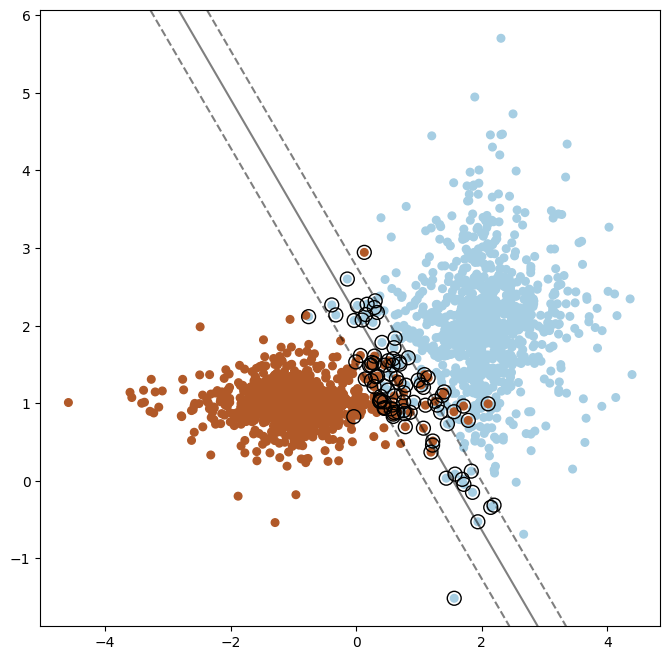

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data.loc[:, "x"], data.loc[:, "y"], c=data.loc[:, "source"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

Try the same using another kernel to see how the decision boundary changes:

/home/daniloefl/workspace/ml-lecture-oct-2023/env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


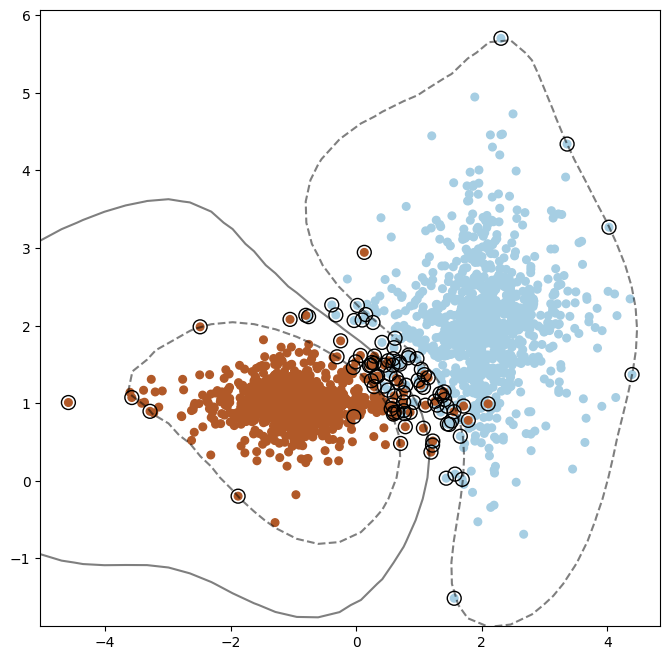

In [10]:
clf_kernel = svm.SVC(kernel="rbf")
clf_kernel.fit(data.loc[:, ["x", "y"]], data.loc[:, "source"])

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(data.loc[:, "x"], data.loc[:, "y"], c=data.loc[:, "source"], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_kernel.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf_kernel.support_vectors_[:, 0],
    clf_kernel.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## Other kernels

What if you try other kernels? How does this separation curve change?